# Анализ датасета FSD50K

## 1) Классифицируем датасет
Датасет FSD50K предназначен для задач классификации аудиофайлов, таких как классификация звуков окружающей среды, музыкальных жанров и т.д.

In [1]:
# Импортируем необходимые библиотеки
from collections import Counter
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from fsd50k import get_dataset_iterator_fsd50k

# Создаем итератор для получения записей из датасета
fsd50k_iterator = get_dataset_iterator_fsd50k()

# Преобразуем итератор в список для дальнейшего анализа
fsd50k_data = list(fsd50k_iterator)

Загрузка датасета FSD50K...


Resolving data files:   0%|          | 0/368 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/103 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/46 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

Датасет FSD50K успешно загружен


## 2) Языки и объем данных
Датасет содержит аудиозаписи, охватывающие различные звуки. Основные: музыкальные инструменты, звуки природы, городские звуки, людские голоса, различные звуки, происходящие в быту. На этом шаге посчитаем общее количество аудиозаписей и их суммарную длительность.

In [2]:
# Подсчитываем общее количество аудиозаписей и суммарную длительность
total_samples = len(fsd50k_data)
total_duration = sum(item.audio_len for item in fsd50k_data)

total_samples, total_duration

(36796, 253415.88842967153)

## 3) Частотный анализ слов в текстах
В этом разделе мы проведем частотный анализ слов в текстовых полях датасета.

In [3]:
# Объединяем все тексты в один и проводим частотный анализ
all_texts = ' '.join(item.text for item in fsd50k_data)
words = all_texts.split()
word_counts = Counter(words)

# Преобразуем частоты в DataFrame для удобства
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
# Топ 10 слов
word_freq_df.head(10)

,word,frequency
1,sounds,41628
0,The,36796
2,of,36796
8,and,33045
4,"instrument,",15607
3,Musical,11607
9,Music,8972
21,instrument,5311
22,Domestic,5004
13,Human,4324


## 4) Статистика по аудиозаписям
В этом разделе мы проведем небольшой анализ датасета.

In [4]:
audio_stats = []

for item in fsd50k_data:
    try:
        audio_data = item.audio['array']
        sampling_rate = item.audio['sampling_rate']
        audio_len = item.audio_len

        # Считаем среднюю амплитуду
        mean_amplitude = np.mean(np.abs(audio_data))

        audio_stats.append({
            'index': item.index,
            'length': audio_len,
            'mean_amplitude': mean_amplitude,
            'sampling_rate': sampling_rate,
        })
    except Exception as e:
        print(f"Ошибка при обработке элемента {item.index}: {e}")

# Преобразуем статистику в DataFrame
audio_stats_df = pd.DataFrame(audio_stats)

# Проверка содержимого DataFrame
print(audio_stats_df)

# Получение описательной статистики
if not audio_stats_df.empty:
    print(audio_stats_df.describe())
else:
    print("Нет доступных данных для анализа.")


               index     length  mean_amplitude  sampling_rate
0      ./train/10047   9.202125        0.046491          48000
1      ./train/25762   5.589042        0.058491          48000
2       ./train/5831   7.210000        0.060715          48000
3       ./train/6656   0.545687        0.036512          48000
4      ./train/23392   1.918375        0.029120          48000
...              ...        ...             ...            ...
36791  ./train/18701   0.869083        0.005604          48000
36792  ./train/25342  19.454687        0.007738          48000
36793  ./train/31081   1.166813        0.109964          48000
36794  ./train/14465   7.224229        0.010267          48000
36795  ./train/11976   5.000000        0.117908          48000

[36796 rows x 4 columns]
             length  mean_amplitude  sampling_rate
count  36796.000000    36796.000000        36796.0
mean       6.887050        0.044201        48000.0
std        7.588762        0.057567            0.0
min        0.3

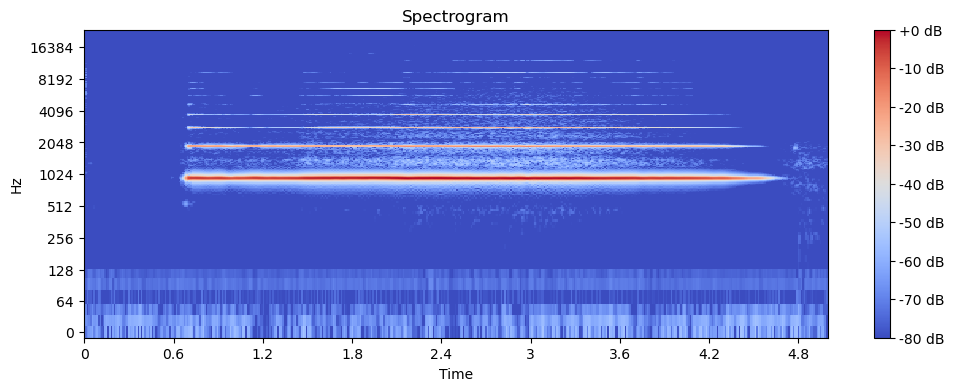

In [5]:
# Визуализация спектрограммы
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()